In [51]:
#SETUP

#imports
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.colors import ListedColormap
import geopandas as gpd
from shapely.geometry import box
import earthpy as et
import seaborn as sns

#need to explicitely ignore wornings about missing geometries
import warnings
warnings.filterwarnings('ignore', 'GeoSeries.notna', UserWarning)

#modify font size
sns.set(font_scale = 1.5)
sns.set_style("white")

#set directory
data = et.data.get_data('spatial-vector-lidar')
os.chdir(
    os.path.join(
        et.io.HOME,
        'earth-analytics'
    )
)

In [52]:
#IMPORTING DATA

america_path = os.path.join(
    "data",
    "spatial-vector-lidar",
    "usa",
    "usa-boundary-dissolved.shp"
)
state_path = os.path.join(
    "data",
    "spatial-vector-lidar",
    "usa",
    "usa-states-census-2014.shp"
)
pop_path = os.path.join(
    "data",
    "spatial-vector-lidar",
    "global",
    "ne_110m_populated_places_simple",
    "ne_110m_populated_places_simple.shp"
)

america = gpd.read_file(america_path)
state = gpd.read_file(state_path)
pop = gpd.read_file(pop_path)

In [53]:
#CHECK CRS

print(america.crs)
print(state.crs)
print(pop.crs)


epsg:4326
epsg:4326
epsg:4326


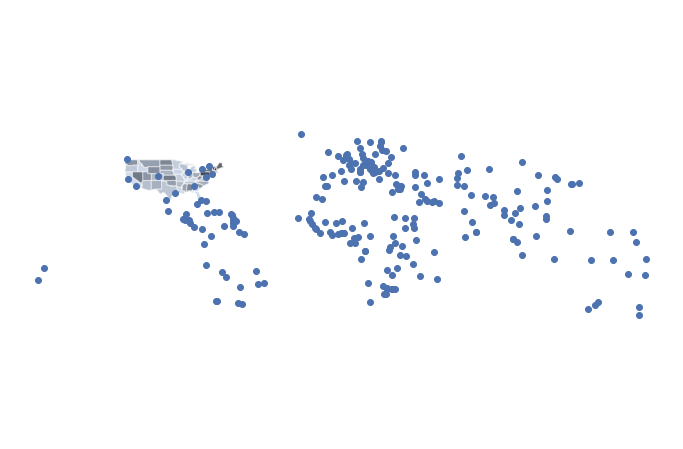

In [54]:
#PLOT

fig,ax = plt.subplots(figsize = (12,8))

america.plot(
    alpha = .5,
    ax = ax
)
state.plot(
    cmap= 'Greys',
    alpha = .5,
    ax = ax
)
pop.plot(
    ax = ax
)
plt.axis('equal')
ax.set_axis_off()
plt.show()

In [55]:
#CLIP
clipped = gpd.clip(pop, america)
clipped[['name', 'geometry', 'scalerank', 'natscale',]].head()

,name,geometry,scalerank,natscale
178,Miami,POINT (-80.22605 25.78956),1,300
177,Houston,POINT (-95.34193 29.82192),1,300
179,Atlanta,POINT (-84.40190 33.83196),1,300
216,Los Angeles,POINT (-118.18193 33.99192),0,600
175,San Francisco,POINT (-122.41717 37.76920),1,300


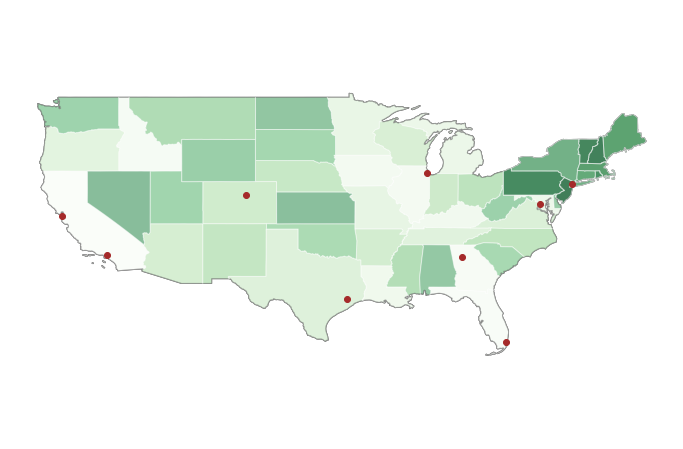

In [56]:
#PLOT AGAIN

fig,ax = plt.subplots(figsize=(12,8))

america.plot(
    alpha = 1,
    color = 'white',
    edgecolor = 'black',
    ax = ax
)
state.plot(
    cmap = 'Greens',
    alpha = .5,
    ax = ax
)
clipped.plot(
    ax = ax,
    color = 'brown'
)


ax.set_axis_off()
plt.axis('equal')

plt.show()


In [57]:
#CLIPPING LINES AND POLYGONS

#setup
roads_path = os.path.join(
    "data",
    "spatial-vector-lidar",
    "global",
    "ne_10m_roads",
    "ne_10m_roads.shp"
)
roads = gpd.read_file(roads_path)

#check crs
if(roads.crs == america.crs):
    print("Match!: ", roads.crs)
else:
    print(roads.crs and america.crs)

#simplify
america_sim = america.simplify(
    .2,
    preserve_topology = True
)

#clip data
roads_clip = gpd.clip(
    roads,
    america
)

#ignore empty geometry
roads_clip = roads_clip[~roads_clip.is_empty]

Match!:  epsg:4326


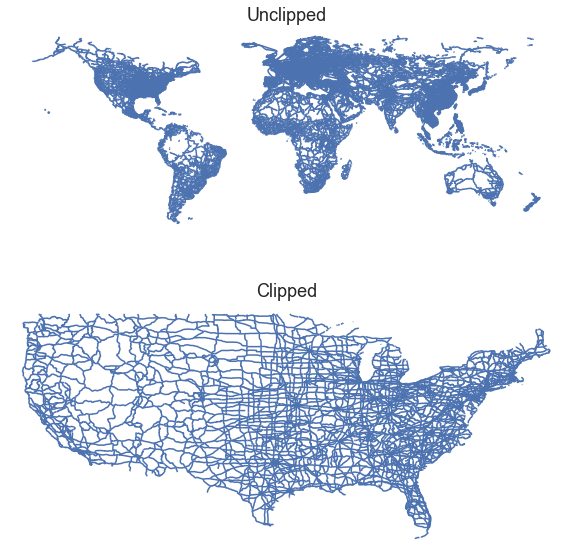

In [58]:
#PLOT

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10,10))

roads.plot(
    ax = ax1
)
roads_clip.plot(
    ax = ax2
)

ax1.set_axis_off()
ax2.set_axis_off()

ax1.set_title("Unclipped")
ax2.set_title("Clipped")

plt.axis('equal')
plt.show()

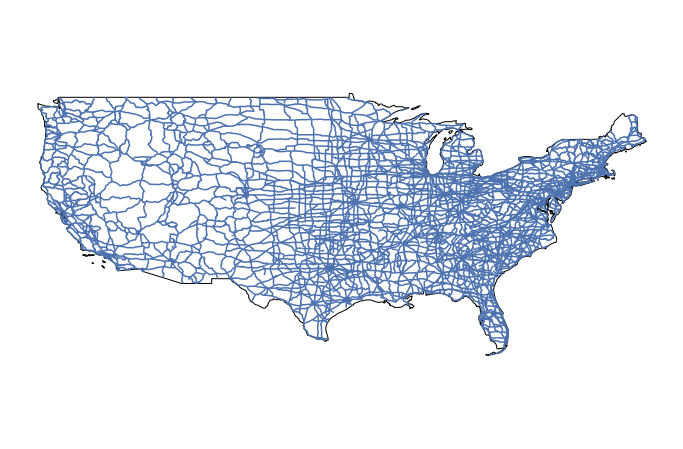

In [59]:
#REPLOT CROPPED DATA

fig, ax = plt.subplots(figsize = (12,8))

america.plot(
    alpha = 1,
    color = 'white',
    edgecolor = 'black',
    ax = ax
)
roads_clip.plot(
    ax = ax
)

ax.set_axis_off()
plt.axis('equal')
plt.show()

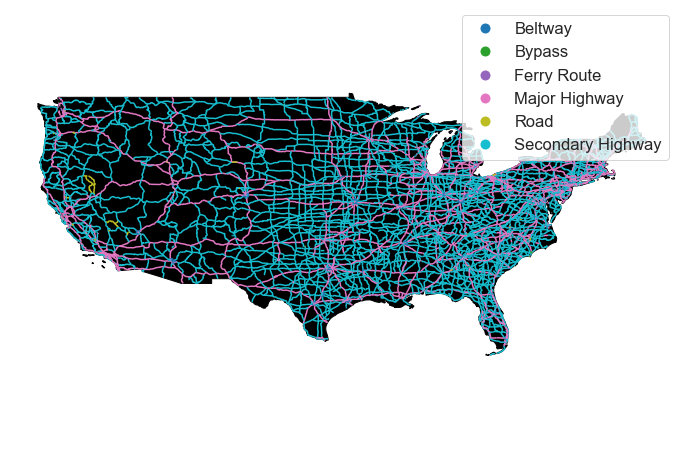

In [60]:
#PLOT BY ATTRIBUTE

fig, ax = plt.subplots(figsize=(12,8))

america.plot(
    alpha = 1,
    color = 'black',
    edgecolor = 'black',
    ax = ax
)
roads_clip.plot(
    ax = ax,
    column = 'type',
    legend = True
)

ax.set_axis_off()
plt.axis('equal')
plt.show()

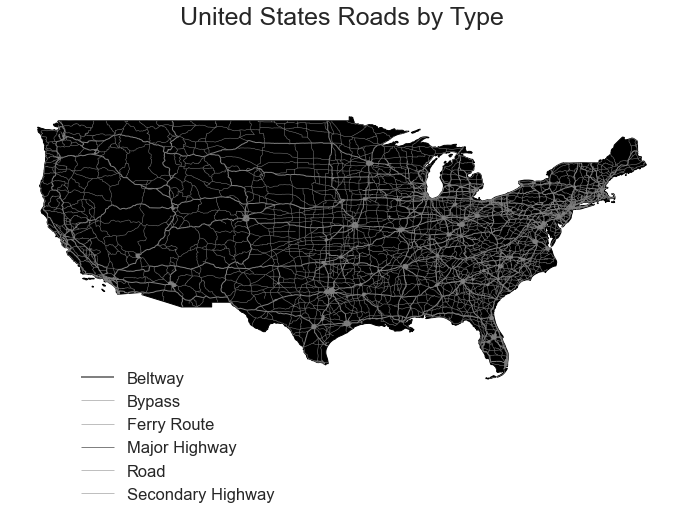

In [61]:
#MAKE A LEGEND

#make a dictionary
road_attrs = {
    'Beltway': ['grey', 2],
    'Secondary Highway': ['gray', .5],
    'Road': ['gray', .5],
    'Bypass': ['gray', .5],
    'Ferry Route': ['gray', .5],
    'Major Highway': ['gray', 1]

}

#plot
fig, ax = plt.subplots(figsize=(12,8))

america.plot(
    alpha = 1,
    color = 'black',
    edgecolor = 'black',
    ax = ax
)
for ctype, data in roads_clip.groupby('type'):
    data.plot(
        color = road_attrs[ctype][0],
        label = ctype,
        linewidth = road_attrs[ctype][1],
        ax = ax
    )

ax.legend(
    frameon = False,
    loc = (0.1, -0.1)
)

ax.set_title("United States Roads by Type", fontsize = 25)
ax.set_axis_off()


plt.axis('equal')
plt.show()